NEW SCRIPT

In [1]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
### ATTIVARE A FINE MESE PER DOWNLOAD DATI MENSILI E SALVARE

#tickers = "SI=F ES=F CL=F YM=F GC=F ^TNX ^VIX EURCHF=X USDCHF=X JPYCHF=X EURUSD=X DX-Y.NYB GBPCHF=X"

#start="2021-03-01"
#end="2021-03-31" #non posso andare prima di 60 giorni dalla data della richiesta
#period="1mo" #funziona
#interval="30m"

In [4]:
#SSMI
#import yfinance as yf
#smi = yf.download("^SSMI", start, end, threads = True, prepost = True)

In [5]:
#smi=smi["Adj Close"]

In [6]:
#smi.to_csv('smi-gen-feb-21.csv',index=True, header=True)

In [7]:
#import yfinance as yf
#df = yf.download(tickers, start, end, period, interval="30m", threads = True, prepost = True)

In [8]:
#df=df["Adj Close"]

In [9]:
#df

In [10]:
#df.to_csv('gen-feb-21.csv',index=True, header=True)

### Partire da qui per caricare dataset da file salvato

In [11]:
smi_saved=pd.read_csv('smi-gen-feb-21.csv',index_col=0)

In [12]:
smi_saved.rename(columns={'Adj Close':'smi'}, inplace=True)

In [13]:
smi_saved 

,smi
Date,
2021-01-05,10694.089844
2021-01-06,10747.080078
2021-01-07,10778.669922
2021-01-08,10797.990234
2021-01-11,10870.419922
2021-01-12,10875.250000
2021-01-13,10846.879883
2021-01-14,10850.809570
2021-01-15,10877.059570


In [14]:
smi_saved.index=pd.to_datetime(smi_saved.index)

In [15]:
smi_saved

,smi
Date,
2021-01-05,10694.089844
2021-01-06,10747.080078
2021-01-07,10778.669922
2021-01-08,10797.990234
2021-01-11,10870.419922
2021-01-12,10875.250000
2021-01-13,10846.879883
2021-01-14,10850.809570
2021-01-15,10877.059570


In [16]:
smi_pct= smi_saved.pct_change(1)

In [17]:
smi_pct

,smi
Date,
2021-01-05,NaN
2021-01-06,0.004955
2021-01-07,0.002939
2021-01-08,0.001792
2021-01-11,0.006708
2021-01-12,0.000444
2021-01-13,-0.002609
2021-01-14,0.000362
2021-01-15,0.002419


In [18]:
df_saved=pd.read_csv('gen-feb-21.csv',index_col=0)

In [19]:
df_saved.shape

(1935, 13)

In [20]:
df_saved.index=pd.to_datetime(df_saved.index)

In [21]:
df1=df_saved.at_time('11:30')
df2=df_saved.at_time('18:00')

In [22]:
df_select = pd.concat([df1, df2], axis=0)
df_select = df_select.sort_values(['Datetime'])

In [23]:
df_pct = df_select.pct_change(1)

In [24]:
df3=df_pct.at_time('18:00')

In [25]:
# Changing object type column to datetime
df3.index = pd.to_datetime(df3.index)

In [26]:
# Creating new column with just the date
df3.index = df3.index.date

In [27]:
final_df = pd.concat([df3, smi_pct], axis=1) 

In [28]:
final_df['smi'] = final_df['smi'].shift(-1, axis = 0) 
final_df

,CL=F,DX-Y.NYB,ES=F,EURCHF=X,EURUSD=X,GBPCHF=X,GC=F,JPYCHF=X,SI=F,USDCHF=X,YM=F,^TNX,^VIX,smi
2021-01-04,-0.020037,0.004425,-0.022230,-0.002154,-0.003553,-0.006834,0.004438,-0.000234,-0.004188,0.001353,-0.021462,NaN,1.664499e-01,NaN
2021-01-05,0.033608,-0.002131,0.003925,-0.000407,0.001600,0.000703,0.000614,-0.000468,-0.000723,-0.002024,0.004283,0.050439,-5.097179e-02,0.004955
2021-01-06,0.015600,0.002609,0.015367,0.001906,-0.002708,0.001923,-0.020121,0.002114,-0.025927,0.004485,0.015540,0.091858,-8.699154e-02,0.002939
2021-01-07,0.001774,-0.000623,0.010399,0.002539,0.001228,0.000709,-0.002917,0.000705,-0.000550,0.001154,0.004745,0.032505,-3.800673e-02,0.001792
2021-01-08,0.003104,0.002949,-0.004007,-0.000536,-0.003176,0.000641,-0.030509,0.001174,-0.076089,0.002998,-0.007544,0.023148,1.706800e-08,0.006708
2021-01-11,0.004820,-0.000575,0.000790,-0.001071,0.000365,0.001525,0.001028,-0.001523,0.005775,-0.001449,0.004481,0.021719,1.273887e-02,0.000444
2021-01-12,0.000378,-0.002609,-0.002763,0.000611,0.002804,0.001059,-0.008495,0.001876,-0.003523,-0.002113,-0.001195,0.018601,4.080754e-02,-0.002609
2021-01-13,-0.007116,-0.000388,0.004684,-0.001573,0.000243,-0.004091,0.001727,-0.000585,0.007683,-0.001924,0.002003,-0.056522,-5.772493e-02,0.000362
2021-01-14,0.009854,-0.001029,-0.000328,-0.002239,0.000243,-0.000692,0.005646,-0.000468,0.018976,-0.002552,0.000419,0.023963,3.153174e-03,0.002419
2021-01-15,-0.009837,0.003173,-0.000662,0.000130,-0.003384,-0.000595,-0.010116,0.000467,-0.016785,0.003504,0.000715,-0.017102,-2.310924e-02,0.001055


In [29]:
for i in final_df.index.values:
    if final_df.loc[i, 'smi'] < 0 :
        final_df.loc[i,'sig'] = 0
    else:
        final_df.loc[i,'sig'] = 1

In [30]:
final_df.dropna(axis=0, inplace=True )

In [31]:
final_df.sig = final_df.sig.astype('int64') 

In [32]:
import matplotlib.pyplot as plt

In [33]:
feature_names = ['oil', 'doll.ind','sp500ft', 'eurchf', 'eurusd', 'gbpchf', 'gold', 'jpychf', 'silver', 'usdchf', 'dj','10y', 'vix']  # a list of the feature names for later
target = final_df['sig']

In [34]:
final_df.rename(columns={'CL=F':'oil','DX-Y.NYB':'doll.ind','ES=F':'sp500ft','EURCHF=X':'eurchf','EURUSD=X':'eurusd','GBPCHF=X':'gbpchf','GC=F':'gold','JPYCHF=X':'jpychf','SI=F':'silver','USDCHF=X':'usdchf','YM=F':'dj','^TNX':'10y','^VIX':'vix'}, inplace=True)

In [35]:
final_df = final_df.drop('smi', 1)

In [36]:
final_df

,oil,doll.ind,sp500ft,eurchf,eurusd,gbpchf,gold,jpychf,silver,usdchf,dj,10y,vix,sig
2021-01-05,0.033608,-0.002131,0.003925,-0.000407,0.001600,0.000703,0.000614,-0.000468,-0.000723,-0.002024,0.004283,0.050439,-5.097179e-02,1
2021-01-06,0.015600,0.002609,0.015367,0.001906,-0.002708,0.001923,-0.020121,0.002114,-0.025927,0.004485,0.015540,0.091858,-8.699154e-02,1
2021-01-07,0.001774,-0.000623,0.010399,0.002539,0.001228,0.000709,-0.002917,0.000705,-0.000550,0.001154,0.004745,0.032505,-3.800673e-02,1
2021-01-08,0.003104,0.002949,-0.004007,-0.000536,-0.003176,0.000641,-0.030509,0.001174,-0.076089,0.002998,-0.007544,0.023148,1.706800e-08,1
2021-01-11,0.004820,-0.000575,0.000790,-0.001071,0.000365,0.001525,0.001028,-0.001523,0.005775,-0.001449,0.004481,0.021719,1.273887e-02,1
2021-01-12,0.000378,-0.002609,-0.002763,0.000611,0.002804,0.001059,-0.008495,0.001876,-0.003523,-0.002113,-0.001195,0.018601,4.080754e-02,0
2021-01-13,-0.007116,-0.000388,0.004684,-0.001573,0.000243,-0.004091,0.001727,-0.000585,0.007683,-0.001924,0.002003,-0.056522,-5.772493e-02,1
2021-01-14,0.009854,-0.001029,-0.000328,-0.002239,0.000243,-0.000692,0.005646,-0.000468,0.018976,-0.002552,0.000419,0.023963,3.153174e-03,1
2021-01-15,-0.009837,0.003173,-0.000662,0.000130,-0.003384,-0.000595,-0.010116,0.000467,-0.016785,0.003504,0.000715,-0.017102,-2.310924e-02,1
2021-01-18,0.000000,0.000000,0.000000,0.001312,0.001087,0.002909,0.000000,0.002216,0.000000,0.000472,0.000000,0.000000,0.000000e+00,0


In [37]:
# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = final_df[feature_names]
# Create DataFrame from target column and feature columns
feature_and_target_cols = ['sig'] + feature_names
feat_targ_df = final_df[feature_and_target_cols]
# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

               sig       oil  doll.ind   sp500ft    eurchf    eurusd  \
sig       1.000000  0.097223  0.047501 -0.100887  0.204324  0.003753   
oil       0.097223  1.000000 -0.164726  0.299506 -0.041996  0.078922   
doll.ind  0.047501 -0.164726  1.000000 -0.215817 -0.092346 -0.961087   
sp500ft  -0.100887  0.299506 -0.215817  1.000000  0.136411  0.112975   
eurchf    0.204324 -0.041996 -0.092346  0.136411  1.000000  0.148057   
eurusd    0.003753  0.078922 -0.961087  0.112975  0.148057  1.000000   
gbpchf   -0.083419  0.120889 -0.185584  0.259378  0.598105  0.080802   
gold     -0.082931  0.120139 -0.548284  0.060630 -0.114811  0.531528   
jpychf   -0.020361  0.049353  0.207961 -0.017746  0.604034 -0.229397   
silver   -0.225553  0.125963 -0.590210  0.211596 -0.084259  0.530975   
usdchf    0.121081 -0.100874  0.748413 -0.007918  0.553680 -0.738994   
dj       -0.239470  0.391022 -0.198389  0.936893  0.021798  0.068006   
10y      -0.145576  0.222048  0.142711  0.116901 -0.107150 -0.14

In [38]:
import seaborn as sns

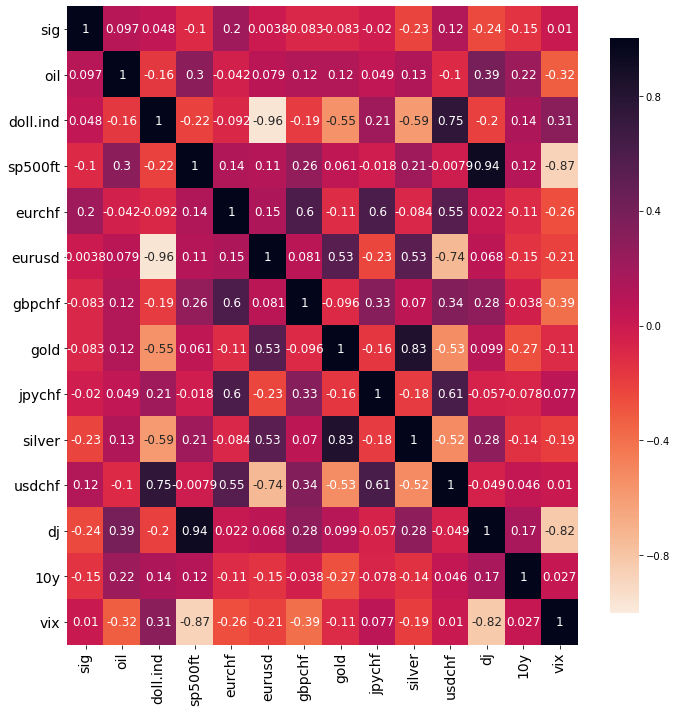

In [39]:
# Plot heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, annot= True, annot_kws = {"size": 12},  ax=ax, cbar_kws={"shrink": .9}, cmap='rocket_r', center=0, vmin=-1, vmax=1)
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()# show the plot

In [40]:
final_df.sig.value_counts()

1    21
0    14
Name: sig, dtype: int64

<AxesSubplot:xlabel='sig', ylabel='count'>

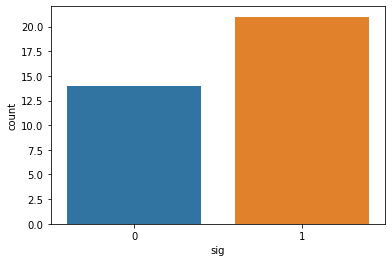

In [42]:
sns.countplot(final_df['sig']) ## check the distribution of some feature
#sns.distplot(data['radius_mean'])
#plt.ylabel("probability ")'])

In [43]:
final_df

,oil,doll.ind,sp500ft,eurchf,eurusd,gbpchf,gold,jpychf,silver,usdchf,dj,10y,vix,sig
2021-01-05,0.033608,-0.002131,0.003925,-0.000407,0.001600,0.000703,0.000614,-0.000468,-0.000723,-0.002024,0.004283,0.050439,-5.097179e-02,1
2021-01-06,0.015600,0.002609,0.015367,0.001906,-0.002708,0.001923,-0.020121,0.002114,-0.025927,0.004485,0.015540,0.091858,-8.699154e-02,1
2021-01-07,0.001774,-0.000623,0.010399,0.002539,0.001228,0.000709,-0.002917,0.000705,-0.000550,0.001154,0.004745,0.032505,-3.800673e-02,1
2021-01-08,0.003104,0.002949,-0.004007,-0.000536,-0.003176,0.000641,-0.030509,0.001174,-0.076089,0.002998,-0.007544,0.023148,1.706800e-08,1
2021-01-11,0.004820,-0.000575,0.000790,-0.001071,0.000365,0.001525,0.001028,-0.001523,0.005775,-0.001449,0.004481,0.021719,1.273887e-02,1
2021-01-12,0.000378,-0.002609,-0.002763,0.000611,0.002804,0.001059,-0.008495,0.001876,-0.003523,-0.002113,-0.001195,0.018601,4.080754e-02,0
2021-01-13,-0.007116,-0.000388,0.004684,-0.001573,0.000243,-0.004091,0.001727,-0.000585,0.007683,-0.001924,0.002003,-0.056522,-5.772493e-02,1
2021-01-14,0.009854,-0.001029,-0.000328,-0.002239,0.000243,-0.000692,0.005646,-0.000468,0.018976,-0.002552,0.000419,0.023963,3.153174e-03,1
2021-01-15,-0.009837,0.003173,-0.000662,0.000130,-0.003384,-0.000595,-0.010116,0.000467,-0.016785,0.003504,0.000715,-0.017102,-2.310924e-02,1
2021-01-18,0.000000,0.000000,0.000000,0.001312,0.001087,0.002909,0.000000,0.002216,0.000000,0.000472,0.000000,0.000000,0.000000e+00,0


In [44]:
final_df.describe()

,oil,doll.ind,sp500ft,eurchf,eurusd,gbpchf,gold,jpychf,silver,usdchf,dj,10y,vix,sig
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.00000
mean,0.003771,-0.000105,0.001585,0.000121,-0.000031,0.000730,-0.002610,0.000705,-0.003103,0.000128,0.001497,0.011413,-0.016379,0.60000
std,0.009815,0.001750,0.007151,0.001524,0.001833,0.002775,0.007907,0.001759,0.018467,0.002195,0.006828,0.030764,0.056470,0.49705
min,-0.011571,-0.004342,-0.016170,-0.004811,-0.003384,-0.008638,-0.030509,-0.001755,-0.076089,-0.004129,-0.013801,-0.056522,-0.150840,0.00000
25%,-0.000280,-0.000654,-0.001977,-0.000546,-0.000970,-0.000643,-0.005539,-0.000470,-0.011096,-0.001851,-0.001774,-0.004958,-0.051993,0.00000
50%,0.001586,0.000000,0.000000,0.000000,0.000121,0.000709,-0.000814,0.000467,-0.000550,0.000157,0.000419,0.007004,-0.021286,1.00000
75%,0.006984,0.000782,0.005327,0.000784,0.000969,0.001983,0.001378,0.001992,0.006895,0.001176,0.004613,0.023556,0.009279,1.00000
max,0.033608,0.003364,0.021344,0.003775,0.005059,0.007979,0.010120,0.005091,0.023109,0.004485,0.018611,0.091858,0.180856,1.00000


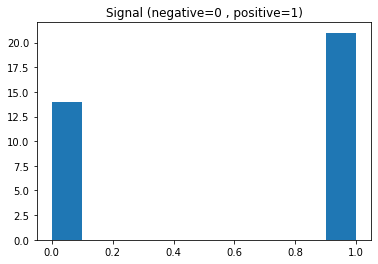

In [45]:

plt.hist(final_df['sig'])
plt.title('Signal (negative=0 , positive=1)')
plt.show()

Text(0, 0.5, 'probability ')

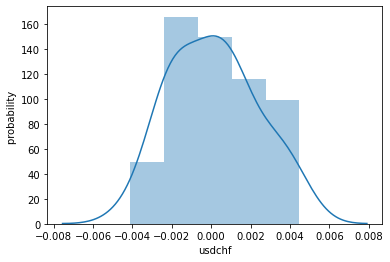

In [46]:
## check the distribution of some feature
sns.distplot(final_df['usdchf'])
plt.ylabel("probability ")

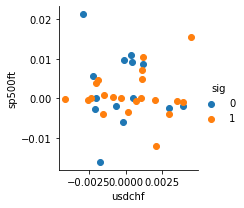

In [47]:
sns.FacetGrid(final_df, hue='sig').map(plt.scatter, 'usdchf','sp500ft').add_legend()  ## a lot of overlapping with the target feature

<AxesSubplot:>

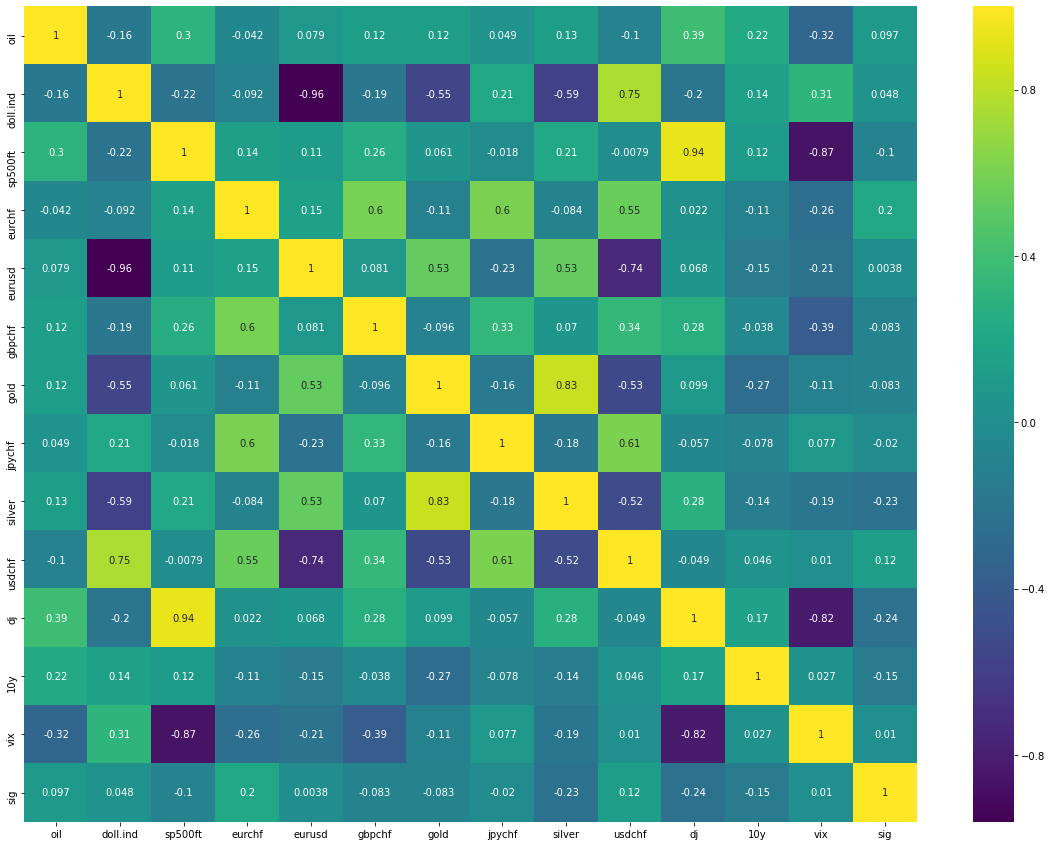

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(final_df.corr(), annot=True, cmap='viridis')



In [49]:
final_df.shape

(35, 14)

In [50]:
final_df.describe()

,oil,doll.ind,sp500ft,eurchf,eurusd,gbpchf,gold,jpychf,silver,usdchf,dj,10y,vix,sig
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.00000
mean,0.003771,-0.000105,0.001585,0.000121,-0.000031,0.000730,-0.002610,0.000705,-0.003103,0.000128,0.001497,0.011413,-0.016379,0.60000
std,0.009815,0.001750,0.007151,0.001524,0.001833,0.002775,0.007907,0.001759,0.018467,0.002195,0.006828,0.030764,0.056470,0.49705
min,-0.011571,-0.004342,-0.016170,-0.004811,-0.003384,-0.008638,-0.030509,-0.001755,-0.076089,-0.004129,-0.013801,-0.056522,-0.150840,0.00000
25%,-0.000280,-0.000654,-0.001977,-0.000546,-0.000970,-0.000643,-0.005539,-0.000470,-0.011096,-0.001851,-0.001774,-0.004958,-0.051993,0.00000
50%,0.001586,0.000000,0.000000,0.000000,0.000121,0.000709,-0.000814,0.000467,-0.000550,0.000157,0.000419,0.007004,-0.021286,1.00000
75%,0.006984,0.000782,0.005327,0.000784,0.000969,0.001983,0.001378,0.001992,0.006895,0.001176,0.004613,0.023556,0.009279,1.00000
max,0.033608,0.003364,0.021344,0.003775,0.005059,0.007979,0.010120,0.005091,0.023109,0.004485,0.018611,0.091858,0.180856,1.00000


In [51]:
corr_matrix=final_df.corr().abs()
#upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#to_drop=[column for column in upper.columns if any(upper[column]>0.95)]

In [52]:
final_df[to_drop]

NameError: name 'to_drop' is not defined

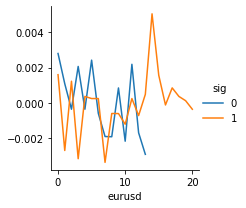

In [53]:


## check these feature with the target feature(diagnosis)
sns.FacetGrid(final_df,hue='sig').map(plt.plot, 'eurusd').add_legend()




here you can see that to drop feature is not correlated with the target feature so drop it from the dataset



In [54]:
final_df.drop(to_drop, axis=1, inplace=True)

NameError: name 'to_drop' is not defined

In [55]:
final_df.shape

(35, 14)

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density. Either provide the bandwidth during initialization or use an alternative method.

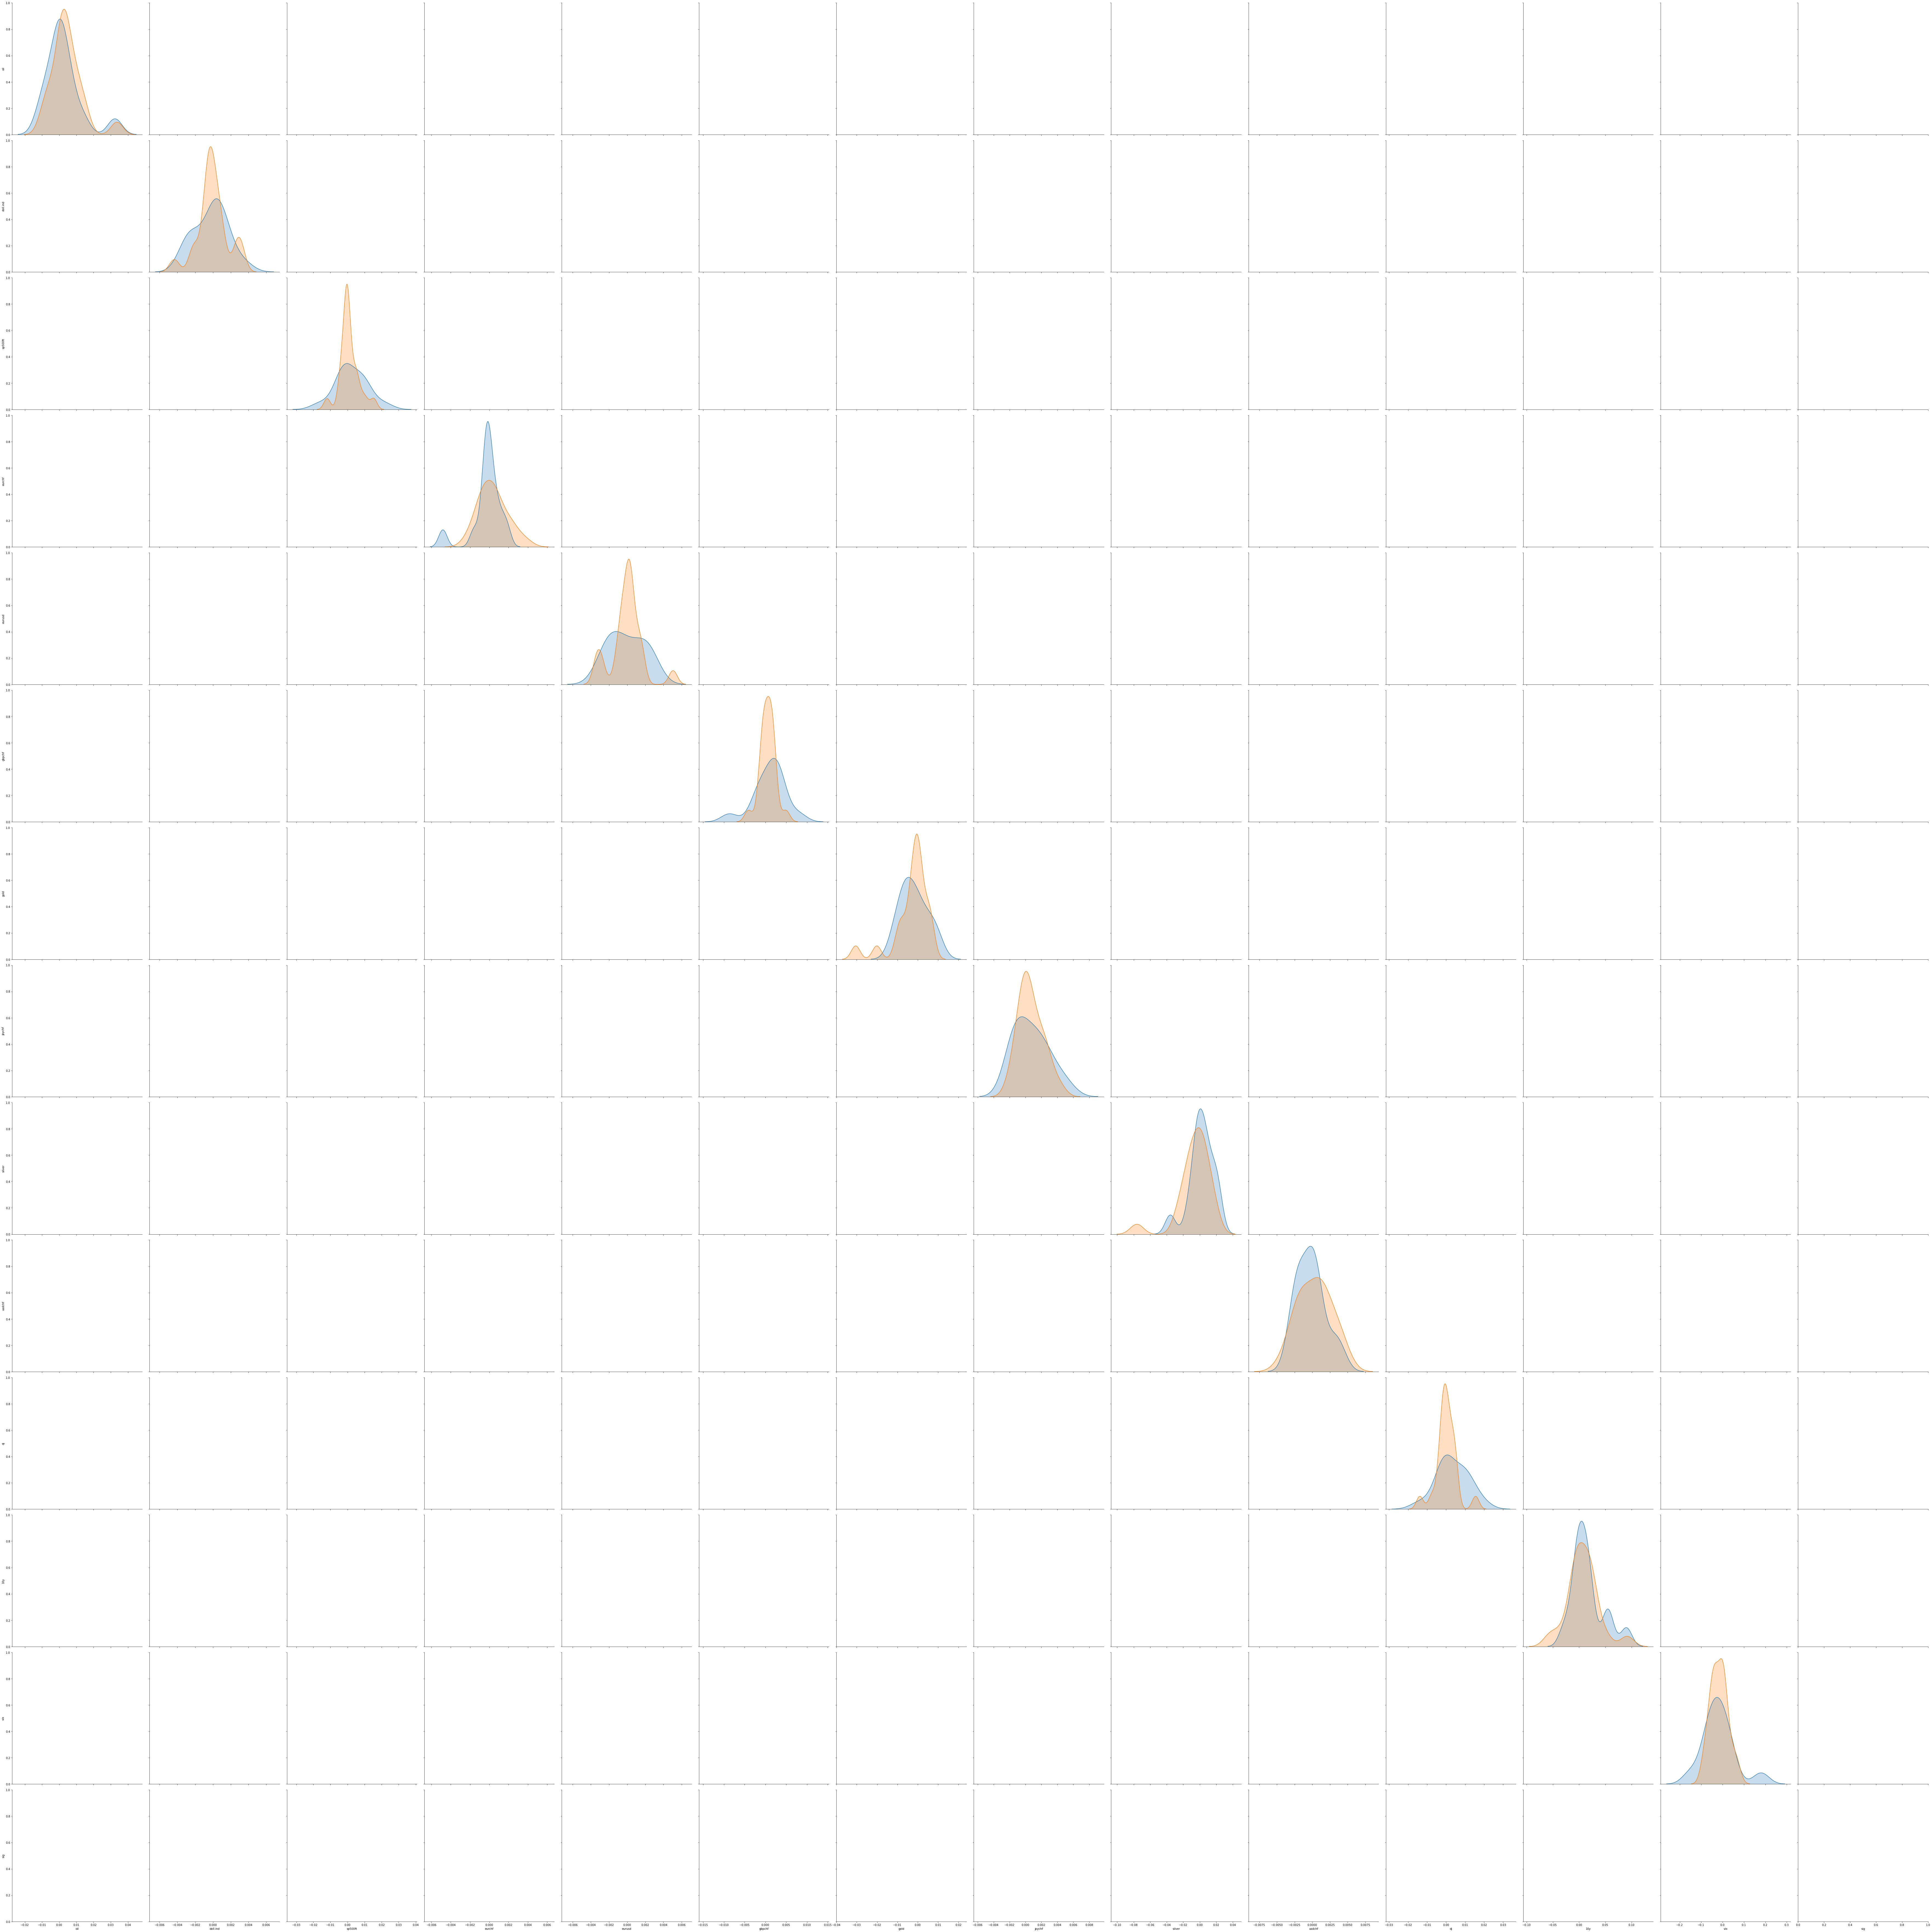

In [56]:
sns.pairplot(final_df, hue='sig', height=7)


split the data into dependent and independent se

In [57]:
x=final_df.drop('sig', axis=1)
y=final_df['sig']

In [58]:
x.head()
print(x.shape)

(35, 13)


Apply the machine learning model

In [59]:
x_train ,x_test, y_train ,y_test=train_test_split(x, y, test_size=0.3, random_state=0)
## apply the peprocessing 
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.fit_transform(x_test)



logisticregression

In [60]:
logistic=LogisticRegression()
logistic.fit(x_train_scaler, y_train)
predict1=logistic.predict(x_test_scaler)
print("training set score:", logistic.score(x_train_scaler, y_train))
print('testing set score :', logistic.score(x_test_scaler, y_test))


training set score: 0.7083333333333334
testing set score : 0.8181818181818182


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
print("confusion matrix : ", confusion_matrix(y_test, predict1))
print("classification report :", classification_report(y_test, predict1))


confusion matrix :  [[3 2]
 [0 6]]
classification report :               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.75      1.00      0.86         6

   micro avg       0.82      0.82      0.82        11
   macro avg       0.88      0.80      0.80        11
weighted avg       0.86      0.82      0.81        11



KNeighborsClassifier

In [62]:
neighbor=KNeighborsClassifier(n_neighbors=3)
neighbor.fit(x_train_scaler, y_train)
predict2=neighbor.predict(x_test_scaler)
print("training set score:", neighbor.score(x_train_scaler, y_train))
print('testing set score :', neighbor.score(x_test_scaler, y_test))


training set score: 0.7083333333333334
testing set score : 0.6363636363636364


In [63]:
print("confusion matrix : ", confusion_matrix(y_test, predict2))
print("classification report :", classification_report(y_test, predict2))

confusion matrix :  [[1 4]
 [0 6]]
classification report :               precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.60      1.00      0.75         6

   micro avg       0.64      0.64      0.64        11
   macro avg       0.80      0.60      0.54        11
weighted avg       0.78      0.64      0.56        11




Decision tree classifier



In [64]:
decision=DecisionTreeClassifier(max_depth=3)
decision.fit(x_train_scaler, y_train)
predict3=decision.predict(x_test_scaler)
print("training set score:", decision.score(x_train_scaler, y_train))
print('testing set score :', decision.score(x_test_scaler, y_test))



training set score: 0.9583333333333334
testing set score : 0.6363636363636364


In [65]:
print("confusion matrix : ", confusion_matrix(y_test, predict3))
print("classification report :", classification_report(y_test, predict3))

confusion matrix :  [[3 2]
 [2 4]]
classification report :               precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.67      0.67      0.67         6

   micro avg       0.64      0.64      0.64        11
   macro avg       0.63      0.63      0.63        11
weighted avg       0.64      0.64      0.64        11



random forest Classifier

In [66]:
random_forest=RandomForestClassifier(max_depth=3)
random_forest.fit(x_train_scaler, y_train)
predict4=random_forest.predict(x_test_scaler)
print("training set score:", random_forest.score(x_train_scaler, y_train))
print('testing set score :', random_forest.score(x_test_scaler, y_test))

training set score: 1.0
testing set score : 0.5454545454545454


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [67]:
print("confusion matrix : ", confusion_matrix(y_test, predict4))
print("classification report :", classification_report(y_test, predict4))

confusion matrix :  [[3 2]
 [3 3]]
classification report :               precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.60      0.50      0.55         6

   micro avg       0.55      0.55      0.55        11
   macro avg       0.55      0.55      0.55        11
weighted avg       0.55      0.55      0.55        11



support vector classifier

In [68]:
svm=SVC(C=10)
svm.fit(x_train_scaler, y_train)
predict5=svm.predict(x_test_scaler)
print("training set score:", svm.score(x_train_scaler, y_train))
print('testing set score :', svm.score(x_test_scaler, y_test))


training set score: 1.0
testing set score : 0.6363636363636364


In [69]:
print("confusion matrix : ", confusion_matrix(y_test, predict5))
print("classification report :", classification_report(y_test, predict5))

confusion matrix :  [[2 3]
 [1 5]]
classification report :               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.62      0.83      0.71         6

   micro avg       0.64      0.64      0.64        11
   macro avg       0.65      0.62      0.61        11
weighted avg       0.64      0.64      0.62        11



best model

In [70]:
## SVC
print('prediction of logreg is :', predict1)



prediction of logreg is : [0 1 0 1 1 1 1 1 0 1 1]


### DOWNLOAD DATI GIORNO DI VERIFICA

In [71]:
### download dati giornalieri
tickers = "SI=F ES=F CL=F YM=F GC=F ^TNX ^VIX EURCHF=X USDCHF=X JPYCHF=X EURUSD=X DX-Y.NYB GBPCHF=X"

start="2021-03-08" # giorno odierno
end="2021-03-09" # giorno domani
interval="30m"

import yfinance as yf
df_td = yf.download(tickers, start, end,  interval="30m", threads = True, prepost = True)

### solo per calcolo giornaliero
df_td=df_td["Adj Close"]


[*********************100%***********************]  13 of 13 completed


In [72]:
df_td.index=pd.to_datetime(df_td.index)

df1=df_td.at_time('11:30')
df2=df_td.at_time('18:00')

df_select = pd.concat([df1, df2], axis=0)
df_select = df_select.sort_values(['Datetime'])

df_pct = df_select.pct_change(1)
df3=df_pct.at_time('18:00')

# Changing object type column to datetime
df3.index = pd.to_datetime(df3.index)

# Creating new column with just the date
df3.index = df3.index.date

### 

In [73]:
df3

,CL=F,DX-Y.NYB,ES=F,EURCHF=X,EURUSD=X,GBPCHF=X,GC=F,JPYCHF=X,SI=F,USDCHF=X,YM=F,^TNX,^VIX
2021-03-08,-0.021874,0.000249,0.014396,0.000478,-0.000475,0.001408,-0.002793,-0.000349,0.003176,0.001124,0.02002,NaN,-0.109801


In [74]:
df3['^TNX'] = df3['^TNX'].fillna(0.02702703) #trovato si Yfinance e caclolato a mano

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
df3

,CL=F,DX-Y.NYB,ES=F,EURCHF=X,EURUSD=X,GBPCHF=X,GC=F,JPYCHF=X,SI=F,USDCHF=X,YM=F,^TNX,^VIX
2021-03-08,-0.021874,0.000249,0.014396,0.000478,-0.000475,0.001408,-0.002793,-0.000349,0.003176,0.001124,0.02002,0.027027,-0.109801


In [76]:
# define input
new_input = df3

In [77]:

# get prediction for new input
new_output = logistic.predict(new_input)
new_output

array([1])

### FINE